# **Classification Project - Hotel Booking Cancellation Prediction**

# **Marks: 30**

Welcome to the project on classification. We will use the **INN Hotels dataset** for this project.

--------------------------------
## **Context** 
-------------------------------

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include changes of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers' booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings potentially impacts a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices at last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

----------------------------
## **Objective**
----------------------------- 

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting **which booking is likely to be canceled**. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You, as a data scientist, have to analyze the data provided to find which **factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.**


--------------------------
## **Data Description**
--------------------------

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: The unique identifier of each booking

* no_of_adults: The number of adults

* no_of_children: The number of children

* no_of_weekend_nights: The number of weekend nights (Saturday and Sunday) the guest stayed or booked to stay at the hotel

* no_of_week_nights: The number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel

* type_of_meal_plan: The type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)

* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

* room_type_reserved: The type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

* lead_time: The number of days between the date of booking and the arrival date

* arrival_year: The year of arrival date

* arrival_month: The month of arrival date

* arrival_date: The date of the month

* market_segment_type: Market segment designation.

* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

* no_of_previous_cancellations: The number of previous bookings that were canceled by the customer before the current booking

* no_of_previous_bookings_not_canceled: The number of previous bookings not canceled by the customer before the current booking

* avg_price_per_room: The average price per day for the reservation; prices of the rooms are dynamic. (in euros)

* no_of_special_requests: The total number of special requests made by the customer (e.g. high floor, view from the room, etc.)

* booking_status: Flag indicating if the booking was canceled or not.

## **Importing the necessary libraries and overview of the dataset**

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# To tune the model
from sklearn.model_selection import GridSearchCV

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

### **Loading the data**

In [2]:
hotel = pd.read_csv("INNHotelsGroup.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data = hotel.copy()

### **View the first and the last 5 rows of the dataset**

In [4]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


### **Checking the info of the data**

In [6]:
# data.info()

* The dataset has **36,275 rows and 19 columns**. 

* `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, and `booking_status` are of **object type** while the rest of the columns are numeric in nature.

* There are **no null values** in the dataset.

* **Booking_ID column is an identifier**. Let's check if each entry of the column is unique.

In [7]:
data.Booking_ID.nunique()

36275

**Observations:**
- We can see that **all the entries of this column are unique**. Hence, this column would not add any value to our analysis. 
- Let's drop this column.

### **Dropping the Booking_ID column**

In [8]:
data = data.drop(["Booking_ID"], axis = 1)

In [9]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## **Exploratory Data Analysis and Data Preprocessing**

### **Summary Statistics for numerical columns**

### **Question 1: Write the observations from the below summary statistics (2 Marks)**

In [10]:
# Selecting numerical columns and checking the summary statistics
num_cols = data.select_dtypes('number').columns

data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


**Observations:_____**

In [11]:
# Checking the rows where the avg_price_per_room is 0
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


- In the market segment column, it looks like **many values are complementary**. Let's check the market segment where the room prices are equal to 0.

In [12]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

**Observations:**

* It makes sense that most values with room prices equal to 0 are the rooms given as a complimentary service by the hotel.
* The rooms booked online might be a part of some promotional campaign done by the hotel. We will not treat these rows as we don't have the data to test this claim.

### **Checking the distribution and outliers for numerical columns in the data**

lead_time
Skew : 1.29


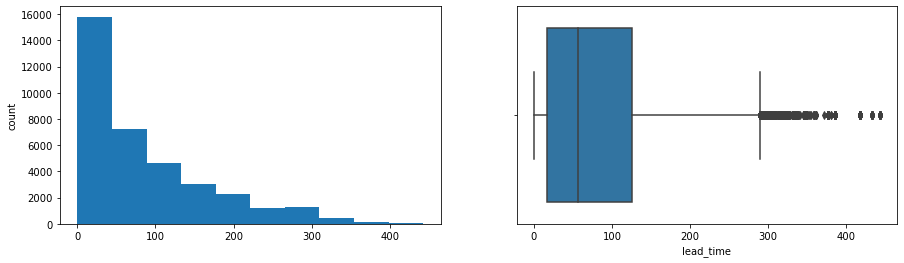

no_of_previous_cancellations
Skew : 25.2


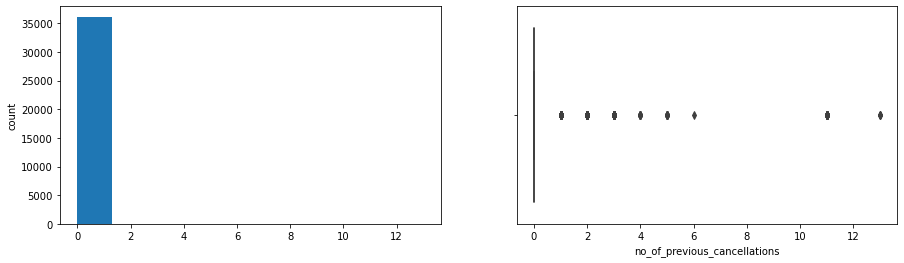

no_of_previous_bookings_not_canceled
Skew : 19.25


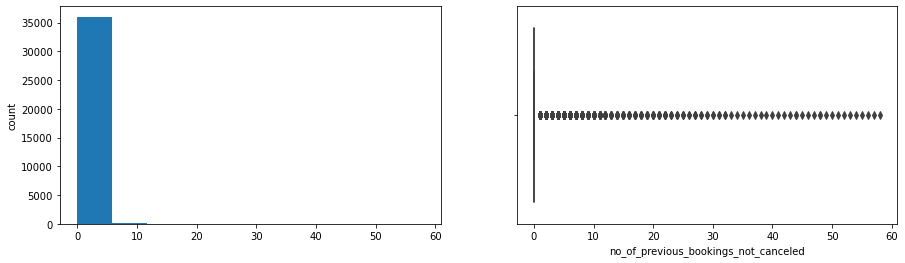

avg_price_per_room
Skew : 0.67


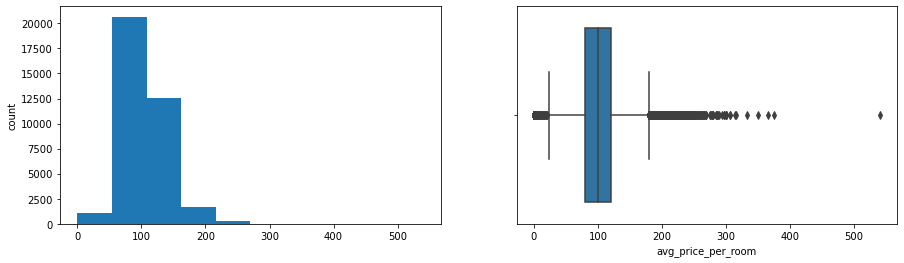

In [13]:
for col in ['lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room']:
    print(col)
    
    print('Skew :', round(data[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1,2,1)
    
    data[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

- The distribution of **lead time is right-skewed** implies the majority of customer make bookings close to the arrival date. Many customers have made the booking on the same day of arrival as well. There are many outliers, **some customers made booking more than 400 days in advance**. 
- **Very few customers have more than one cancellation**. Some customers canceled more than 12 times.
- **Very few customers have more than 1 booking not canceled previously**. 
- **The distribution of average price per room is skewed to right**. The boxplot shows that there are outliers on both sides. The median price of a room is around ~100 euros. There is 1 observation where the average price of the room is more than 500 euros. This observation is quite far away from the rest of the values. We can treat this by clipping the value to the upper whisker (Q3 + 1.5 * IQR).

In [14]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [15]:
# Assigning the value of upper whisker to outliers
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

**Now, let's check the percentage of each category for categorical variables.**

### **Question 2:**

- **Write the code to check the percentage of each category for columns mentioned below (cat_cols) (2 Marks)**
- **Write your observations (2 Marks)**

In [16]:
cat_cols = ['no_of_adults', 'no_of_children', 'no_of_week_nights', 'no_of_weekend_nights', 'required_car_parking_space', 
        'type_of_meal_plan', 'room_type_reserved', 'arrival_month', 'market_segment_type', 'no_of_special_requests', 
        'booking_status']

# strings [type_of_meal_plan,room_type_reserved,market_segment_type,booking_status]
# in the list above, we have some features which are of type string
# we can't take the percentage of string data, so we will count the values and divide it by the total and Xply by 100


# we are taking percentage of all the numerical features
adults_percent = (data['no_of_adults'].value_counts() / data['no_of_adults'].sum()) * 100
children_percent = (data['no_of_children'].value_counts() / data['no_of_children'].sum()) * 100
week_percent = (data['no_of_week_nights'].value_counts() / data['no_of_week_nights'].sum()) * 100
weekend_percent = (data['no_of_weekend_nights'].value_counts() / data['no_of_weekend_nights'].sum()) * 100
parking_percent = (data['required_car_parking_space'].value_counts() / data['required_car_parking_space'].sum()) * 100
arrival_percent = (data['arrival_month'].value_counts() / data['arrival_month'].sum()) * 100
special_percent = (data['no_of_special_requests'].value_counts() / data['no_of_special_requests'].sum()) * 100


In [17]:
data.type_of_meal_plan.value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [18]:
# we are taking the overall count of each meal and taking the percentage
meal_1 = 27835/36275*100
meal_0 = 5130/36275*100
meal_2 = 3305/36275*100
meal_3 = 5/36275*100


In [19]:
# let's take percentage of the reserved room types
data.room_type_reserved.value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [20]:
room_1 = 28130/36275*100
room_4 = 6057/36275*100
room_6 = 966/36275*100
room_2 = 692/36275*100
room_5 = 265/36275*100
room_7 = 158/36275*100
room_3 = 7/36275*100

In [21]:
# similarly let take percentage of the market_segment_type column
data.market_segment_type.value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [22]:
online= 23214/36275*100
offline= 10528/36275*100
corporate= 2017/36275*100
complimentary = 391/36275*100
aviation= 125/36275*100

In [23]:
# lets take the percentage of booking_status
data.booking_status.value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [24]:
not_canceled = 24390/36275*100
canceled = 11885/36275*100

In [25]:
print('\nAdults\n',adults_percent,'\n\nChildren Percentage\n',children_percent,
      '\n\nWeek Nights Percentage\n',week_percent,
      '\n\nWeekend Nights Percentage\n',weekend_percent,
      '\n\nCar Parking Nights Percentage\n',parking_percent,
      '\n\nCar Arrival Month Percentage\n',arrival_percent,
      '\n\nSpecial Requests Percentage\n',arrival_percent,
      '\n\nMeal Type Percentage\n\nMeal 1 :',meal_1,'\nNot Selected : ',meal_0,'\nMeal 2 : ',meal_2,'\nMeal_3 : ',meal_3,
      '\n\nRoom Type Percentage\n\nRoom 1 :',room_1,'\nRoom 2 : ',room_2,'\nRoom 3 : ',room_3,'\nRoom 4 : ',room_4,'\nRoom 5 : ',room_5,'\nRoom 6 : ',room_6,'\nRoom 7 : ',room_7,
      '\n\nMarket Segment Percentage\n\nOnline :',online,'\noffline : ',offline,'\nComplimentary : ',complimentary,'\nAviation : ',aviation,
      '\n\nBooking Status Percentage\n\nNot Canceled :',not_canceled,'\ncanceled : ',canceled,
      
     )
      
      
      


Adults
 2    39.010250
1    11.497774
3     3.462033
0     0.207692
4     0.023907
Name: no_of_adults, dtype: float64 

Children Percentage
 0     879.209217
1      42.367112
2      27.703587
3       0.497512
9       0.052370
10      0.026185
Name: no_of_children, dtype: float64 

Week Nights Percentage
 2     14.311977
1     11.865785
3      9.803529
4      3.739323
0      2.985205
5      2.018484
6      0.236365
7      0.141319
8      0.077538
10     0.077538
9      0.042521
11     0.021260
15     0.012506
12     0.011255
14     0.008754
13     0.006253
17     0.003752
16     0.002501
Name: no_of_week_nights, dtype: float64 

Weekend Nights Percentage
 0    57.370193
1    33.986195
2    30.844299
3     0.520249
4     0.438641
5     0.115611
6     0.068006
7     0.003400
Name: no_of_weekend_nights, dtype: float64 

Car Parking Nights Percentage
 0    3127.313167
1     100.000000
Name: required_car_parking_space, dtype: float64 

Car Arrival Month Percentage
 10    1.974429
9     1.71

**Observations:________**

### **Replacing values 9 and 10 for the number of children with 3 and encoding the target variable**

In [26]:
# Replacing values 9 and 10 with 3 for the column no_of_children
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

In [27]:
data["booking_status"] = data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

**We are done with univariate analysis and data preprocessing. Let's explore the data a bit more with bivariate analysis.**

Let's check the relationship of market segment type with the average price per room.

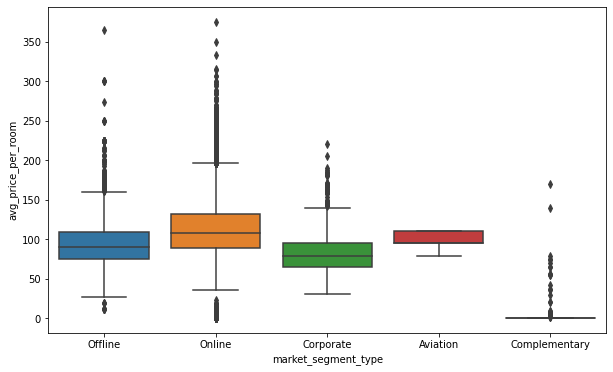

In [28]:
plt.figure(figsize = (10, 6))

sns.boxplot(data = data, x = "market_segment_type", y = "avg_price_per_room")

plt.show()

**Observations:**

* **Rooms booked online have the highest variations in prices.**
* The distribution for offline and corporate room prices are almost similar except for some outliers.
* Complementary market segment gets the rooms at very low prices, which makes sense.

**Let's see how booking status varies across different market segments. Also, how lead time impacts booking status.**

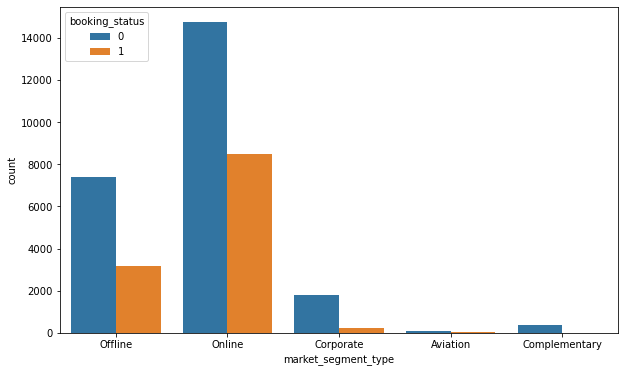

In [29]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'market_segment_type', hue = 'booking_status', data = data)

plt.show()

**Observations:**

* **Online bookings have the highest number of cancellations.**
* Bookings made offline are less prone to cancellations.
* Corporate and complementary segment also show very low number of cancellations.

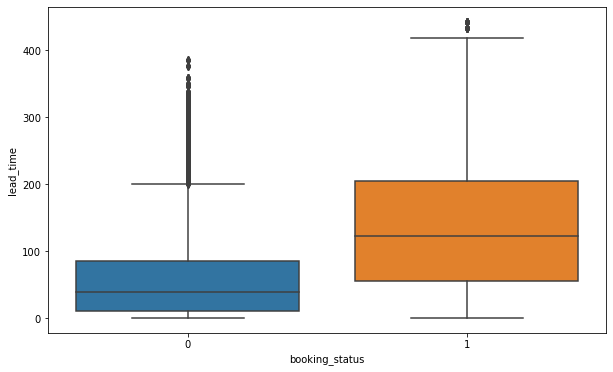

In [30]:
plt.figure(figsize = (10, 6))

sns.boxplot(data = data, x = "booking_status", y = "lead_time")

plt.show()

**Observations:**

* There's a big difference in the median value of lead time for bookings that were canceled and bookings that were not canceled. 
- **The higher the lead time, the higher are the chances of a booking being canceled.**

**Now, let's check how the arrival month impacts the booking status.**

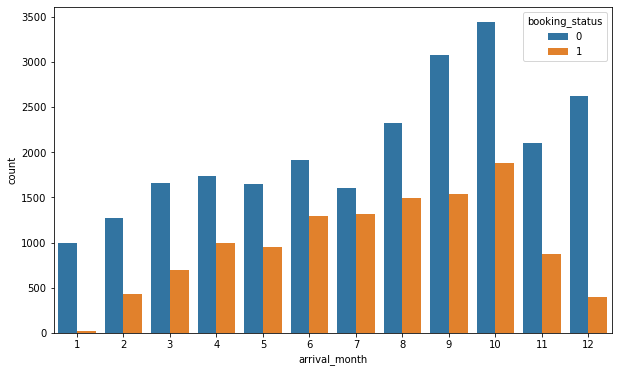

In [31]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'arrival_month', hue = 'booking_status', data = data)

plt.show()

**Observations:**

- We observed earlier that the month of October has the highest number of bookings but the above plot shows that **October has the highest number of cancellations** as well.
- Bookings made for **December and January are least prone to cancellations**.

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**

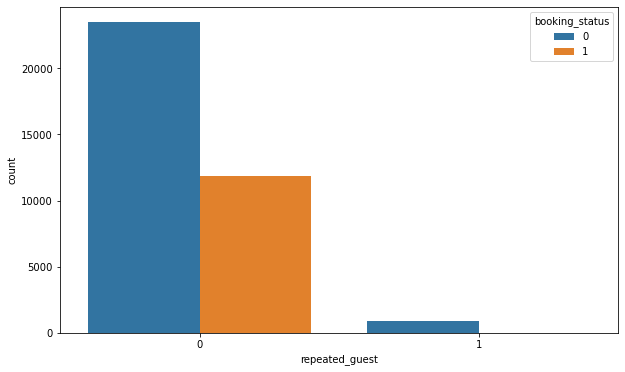

In [32]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'repeated_guest', hue = 'booking_status', data = data)

plt.show()

**Observations:**

* There are **very few repeat customers but the cancellation among them is very less**. 
* This is a good indication as repeat customers are important for the hospitality industry as they can help in spreading the word of mouth.

**We have explored different combinations of variables. Now, let's see the pairwise correlations between all the variables.**

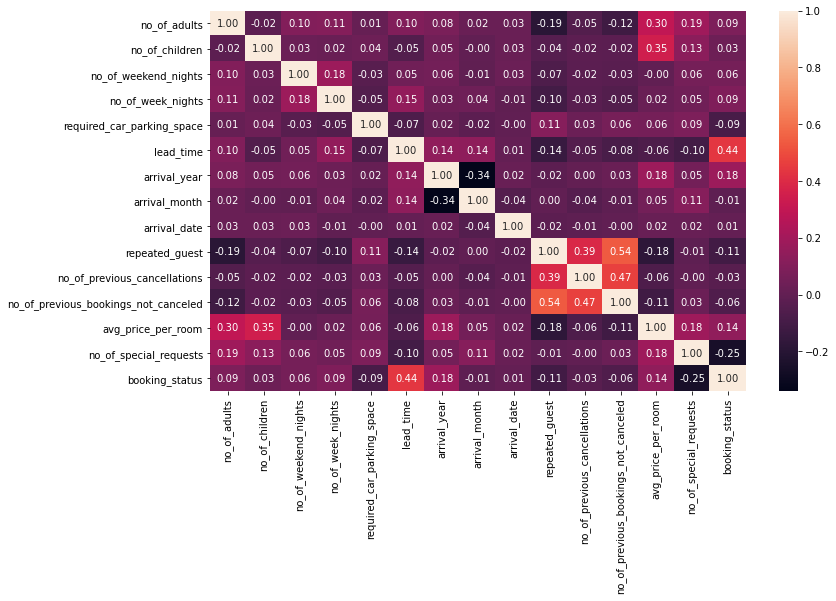

In [33]:
plt.figure(figsize = (12, 7))

sns.heatmap(data.corr(), annot = True, fmt = ".2f")

plt.show()

**Observations:**

* There's a **weak positive correlation between the number of customers (adults and children) and the average price per room**. This makes sense as more the number of customers more the price of the rooms.
* There's a **weak negative correlation between average room price and repeated guests**. The hotel might be giving some loyalty benefits to the customers.
* **Repeated guests have a positive correlation with the number of previous bookings canceled and previous bookings not canceled.** This implies that repeated customers are also likely to cancel their bookings.  
* There's a weak positive correlation between lead time and the number of weeknights a customer is planning to stay in the hotel.
* There's a **positive correlation between booking status and lead time**, indicating higher the lead time higher are the chances of cancellation.
* There's a weak negative correlation between the number of special requests from the customer and the booking status, indicating **if a customer has made some special requests the chances of cancellation might decrease**.

**Now that we have explored our data, let's prepare it for modeling.**

## **Preparing the data for modeling**

- Models cannot take non-numeric inputs. So, we will first create dummy variables for all the categorical variables.
- We will then split the data into train and test sets.

### **Question 3:**

- **Drop the target variable from the original data and store it in a separate DataFrame `X` (1 Mark)**
- **Store the target variable in a separate series `Y` (1 Mark)**

In [34]:
# Remove the blanks and complete the below code
X = data.drop('booking_status', axis = 1) # storing the whole data except booking_status in X
Y = data.booking_status # storing the Booking_Status in Y

In [35]:
# let's print the data in X
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0


In [36]:
# printing the Y
Y

0        0
1        0
2        1
3        1
4        1
        ..
36270    0
36271    1
36272    0
36273    1
36274    0
Name: booking_status, Length: 36275, dtype: int64

In [37]:
# Creating dummy variables, drop_first = True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first = True)

In [38]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

## **Building Classification Models**

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem at hand.**

### **Model evaluation criterion**

**Model can make wrong predictions as:**

1. Predicting a customer will not cancel their booking but in reality, the customer cancels their booking.
2. Predicting a customer will cancel their booking but in reality, the customer does not cancel their booking. 

**Which case is more important?** 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled, then the hotel will lose resources and will have to bear additional costs of unsold rooms. The hotel might also have to bear an additional cost of advertising the room again on different distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled, then the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.


**How to reduce the losses?**

* Hotel would want `F1 Score` to be maximized, greater the F1 score, higher are the chances of minimizing False Negatives and False Positives. 

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [39]:
# Function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Canceled', 'Canceled'], yticklabels = ['Not Canceled', 'Canceled'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

### **Logistic Regression**

### **Question 4: Fit the logistic regression model on the train dataset using random_state = 1 (2 Marks)**

In [40]:
# Define Logistic Regression model 
log_reg= LogisticRegression(random_state = 1)

# Fit the model
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [41]:
# lets check the accuracy 
log_reg.score(X_test,y_test)

0.8060277497013691

**Let's check the coefficient of each dependent variable in the data**.

### **Question 5: Write your observations on the below coefficients obtained from the logistic regression model (3 Marks)**

**Note:** There might be slight variation in the coefficients depending on the library version you are using. There will be no deducting in marks for that as long as your observations are aligned with the output. In case, the coefficients vary too much, please make sure your code is correct.

In [42]:
pd.Series(log_reg.coef_[0], index = X_train.columns).sort_values(ascending = False)

market_segment_type_Online              0.624153
type_of_meal_plan_Not Selected          0.321729
no_of_weekend_nights                    0.182911
avg_price_per_room                      0.019715
lead_time                               0.015484
no_of_week_nights                       0.011122
no_of_adults                            0.011093
arrival_date                            0.001729
type_of_meal_plan_Meal Plan 3           0.000400
room_type_reserved_Room_Type 3          0.000342
arrival_year                           -0.001735
room_type_reserved_Room_Type 2         -0.004277
market_segment_type_Complementary      -0.008788
room_type_reserved_Room_Type 5         -0.011092
room_type_reserved_Room_Type 7         -0.017809
no_of_previous_cancellations           -0.024786
market_segment_type_Corporate          -0.031297
room_type_reserved_Room_Type 4         -0.032666
repeated_guest                         -0.043460
room_type_reserved_Room_Type 6         -0.045539
no_of_children      

**Observations:_________**

### **Question 6: Write your interpretations of the odds calculated from the logistic regression model coefficients (3 Marks)**

In [43]:
# Finding the odds
odds = np.exp(log_reg.coef_[0]) 

# Adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False) 

,odds
market_segment_type_Online,1.866664
type_of_meal_plan_Not Selected,1.379510
no_of_weekend_nights,1.200707
avg_price_per_room,1.019911
lead_time,1.015605
no_of_week_nights,1.011184
no_of_adults,1.011155
arrival_date,1.001730
type_of_meal_plan_Meal Plan 3,1.000400
room_type_reserved_Room_Type 3,1.000342


**Observations:_________**

**Now, let's check the performance of the model on the training set**.

### **Question 7: Check the performance on the training data and write your observations from the below classification report and confusion matrix for the training set (3 Marks)**

              precision    recall  f1-score   support

           0       0.82      0.89      0.86     17029
           1       0.74      0.61      0.67      8363

    accuracy                           0.80     25392
   macro avg       0.78      0.75      0.76     25392
weighted avg       0.79      0.80      0.79     25392



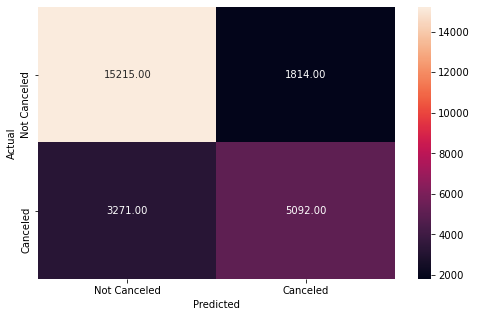

In [44]:
# Checking the performance on the training data
y_pred_train = log_reg.predict(X_train) # predictions on training data
metrics_score(y_train,y_pred_train) # calling the metric_score fucntion

**Reading confusion matrix (clockwise):**

- **True Positive**: Predicting the customer will not cancel the booking and the customer does not cancel the booking.
- **False Negative**: Predicting the customer will cancel the booking but the customer does not cancel the booking.
- **True Negative**: Predicting the customer will cancel the booking and the customer cancels the booking.
- **False Positive**: Predicting the customer will not cancel the booking but the customer cancels the booking.

**Observations:_____**

**Precision-Recall Curve for Logistic Regression**

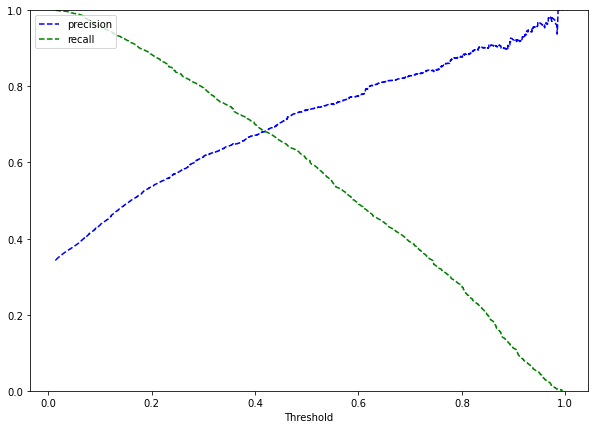

In [45]:
# predict_proba gives the probability of each observation belonging to each class

y_scores = log_reg.predict_proba(X_train) 

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:,1])

# Plotting values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds, precisions[:-1], 'b--', label = 'precision')

plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

**Observations:**

- We can see that **the precision and the recall are balanced for the threshold of about 0.4.**
- Let's try to calculate the exact threshold where precision and recall are equal.

In [46]:
# Calculating the exact threshold where precision and recall are equal
for i in np.arange(len(thresholds)):
    if precisions[i] == recalls[i]:
        print(thresholds[i])

0.4182620109785518


- The threshold of 0.42 would give a balanced precision and recall.

### **Question 8: Compare the performance of the model on the training set after changing the threshold and check the performance on the testing set  (2 Marks)**

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     17029
           1       0.68      0.68      0.68      8363

    accuracy                           0.79     25392
   macro avg       0.76      0.76      0.76     25392
weighted avg       0.79      0.79      0.79     25392



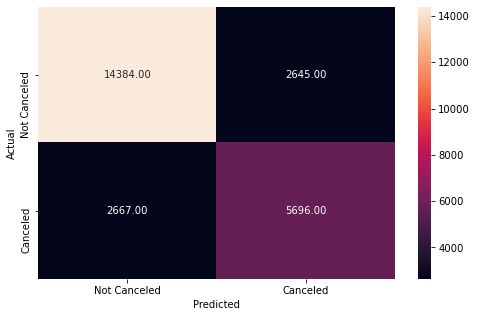

In [47]:
optimal_threshold1 = 0.42

metrics_score(y_train, y_scores[:, 1] > optimal_threshold1)

**Observation:__________**

**Let's check the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7361
           1       0.68      0.68      0.68      3522

    accuracy                           0.79     10883
   macro avg       0.77      0.77      0.77     10883
weighted avg       0.79      0.79      0.79     10883



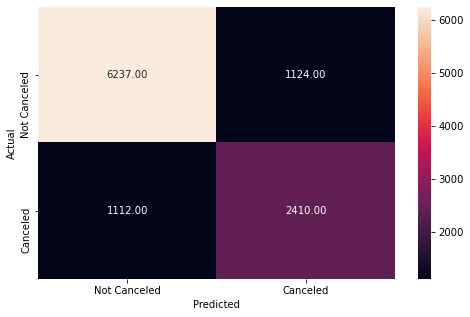

In [48]:
# Checking performance on the testing data
y_pred_test = log_reg.predict_proba(X_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

**Observations:_____**

### **K-Nearest Neighbors (K-NN)**

- K-NN is a distance-based algorithm and all distance-based algorithms are affected by the scale of the data.
- We will scale the attributes (DataFrame X defined above) before building the K-NN model.
- Then, we need to identify the value of K to be used in K-NN. We will use **GridSearchCV** to find the optimal value of K along with other hyperparameters.

In [49]:
# Scaling the data
scaler = StandardScaler()

# fit_transform the training data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

# Transform the testing data
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns) 

### **Using GridSearchCV for find the value of K and other hyperparameters**

**Points to note:**

* Hyperparameter tuning is tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation.
* **Grid search** is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* Grid search is an exhaustive search of values that tries many iterations to compute the optimum values of hyperparameters. So, **it might take up to 30 minutes for the code to run depending on the number of values and hyperparameters passed.**  
* The hyperparameters that we are tuning are:

    - **n_neighbors**: Number of neighbors to use.

    - **weights={'uniform', 'distance'}**
        - uniform : uniform weights. All points in each neighborhood are weighted equally.
        - distance : weight points by the inverse of their distance. In this case, closer neighbors of a query point will have a greater influence than neighbors that are further away.

    - **p**: When p = 1, this is equivalent to using Manhattan_distance (L1), and Euclidean_distance (L2) is used for p = 2.

In [50]:
knn = KNeighborsClassifier()

params_knn = {'n_neighbors':np.arange(2, 20, 2), 'weights':['uniform','distance'], 'p':[1, 2]}

grid_knn = GridSearchCV(estimator = knn, param_grid = params_knn, scoring = 'f1', cv = 10)

model_knn = grid_knn.fit(X_train_scaled,y_train)

knn_estimator = model_knn.best_estimator_

print(knn_estimator)

KNeighborsClassifier(n_neighbors=14, p=1, weights='distance')


### **Question 9:**

- **Fit the KNN model on the scaled training data using the optimal values of hyperparameters obtained from GridSearchCV (1 mark)**
- **Check the performance of the model on the scaled training and testing sets (2 Marks)**
- **Compare the performance and write your observations (1 Marks)**

In [51]:
# Fit the best estimator on the training data
KNN = KNeighborsClassifier(n_neighbors=14, p=1, weights='distance') # training KNN on best params 
KNN.fit(X_train_scaled,y_train) # fitting the model

KNeighborsClassifier(n_neighbors=14, p=1, weights='distance')

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17029
           1       1.00      0.99      0.99      8363

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



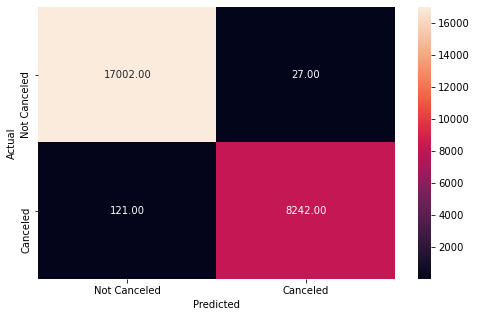

In [52]:
# Make predictions on the scaled training data and check the performance (using metrics_score function)

y_pred_train = KNN.predict(X_train_scaled)

metrics_score(y_train,y_pred_train) # calling the metric_score fucntion

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7361
           1       0.82      0.78      0.80      3522

    accuracy                           0.87     10883
   macro avg       0.86      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883



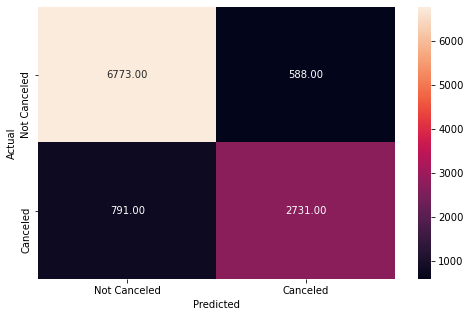

In [53]:
# Make predictions on the scaled testing data and check the performance (using metrics_score function)
y_pred_test = KNN.predict(X_test_scaled)
metrics_score(y_test,y_pred_test) # calling the metric_score fucntion

**Observations:_________**

### **Question 10: Write the conclusion on the key factors that are driving the cancellations and write your recommendations to the business on how they can minimize the number of cancellations. (5 Marks)**

### **Conclusion:**

Write your conclusion here.

### **Recommendations:**

Write your recommendations here.